In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
import re    #for regex
import string
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TengkaiGao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
train = pd.read_csv('G:/toxic_original.csv')

In [59]:
train

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Toxic,comment_text_clean
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explanation why the edits made under my userna...
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,daww he matches this background colour I am se...
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,hey man I am really not trying to edit war its...
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,more i cannot make any real suggestions on im...
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,you sir are my hero any chance you remember wh...
...,...,...,...,...,...,...,...,...,...,...,...
159566,159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,and for the second time of asking when your v...
159567,159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,you should be ashamed of yourself that is a ...
159568,159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,spitzer umm there is no actual article for p...
159569,159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,and it looks like it was actually you who put ...


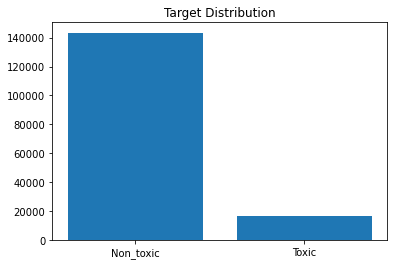

In [60]:
target_count = train.groupby('Toxic').size().reset_index(name='counts')
plt.bar(target_count.Toxic, target_count.counts)
plt.xticks([0,1], labels=["Non_toxic", "Toxic"])
plt.title("Target Distribution")
plt.show()

In [62]:
train['comment_text_clean'] = pd.DataFrame(train["comment_text_clean"].astype('str')) #transfomer to str 

In [63]:
x=train["comment_text_clean"]
y=train["Toxic"]

In [64]:
#Splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1,shuffle=True)

In [65]:
max_feature = 3000#max feature 3000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")#tokenizer 

tokenizer.fit_on_texts(train_x)

In [66]:
sequences = tokenizer.texts_to_sequences(train_x)

In [67]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [68]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=500)

In [69]:
pad_sequences

array([[   0,    0,    0, ...,   46,    2,   35],
       [   0,    0,    0, ...,   13,  605,  122],
       [   0,    0,    0, ...,  423,  138, 1786],
       ...,
       [   0,    0,    0, ...,    2,   46,   28],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,  816,    2,   38]])

In [73]:
model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 500),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 64)           192000    
_________________________________________________________________
dropout_16 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 225,089
Trainable params: 225,089
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_lstm.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [75]:
history = model_lstm.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1
)

Epoch 1/20
1796/1796 [==============================] - 68s 36ms/step - loss: 0.1643 - accuracy: 0.9452 - val_loss: 0.1248 - val_accuracy: 0.9557
Epoch 2/20
1796/1796 [==============================] - 60s 33ms/step - loss: 0.1202 - accuracy: 0.9576 - val_loss: 0.1212 - val_accuracy: 0.9568
Epoch 3/20
1796/1796 [==============================] - 59s 33ms/step - loss: 0.1116 - accuracy: 0.9595 - val_loss: 0.1202 - val_accuracy: 0.9582
Epoch 4/20
1796/1796 [==============================] - 60s 33ms/step - loss: 0.1042 - accuracy: 0.9611 - val_loss: 0.1233 - val_accuracy: 0.9590
Epoch 5/20
1796/1796 [==============================] - 60s 33ms/step - loss: 0.0974 - accuracy: 0.9629 - val_loss: 0.1284 - val_accuracy: 0.9593
Epoch 6/20
1796/1796 [==============================] - 59s 33ms/step - loss: 0.0904 - accuracy: 0.9661 - val_loss: 0.1352 - val_accuracy: 0.9582
Epoch 7/20
1796/1796 [==============================] - 59s 33ms/step - loss: 0.0845 - accuracy: 0.9674 - val_loss: 0.1481 -

In [76]:
y_testing=(model_lstm.predict(x_testing)> 0.5).astype("int32")

In [77]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,y_testing,digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9664    0.9808    0.9736     28640
           1     0.8072    0.7020    0.7509      3275

    accuracy                         0.9522     31915
   macro avg     0.8868    0.8414    0.8623     31915
weighted avg     0.9501    0.9522    0.9507     31915



In [78]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

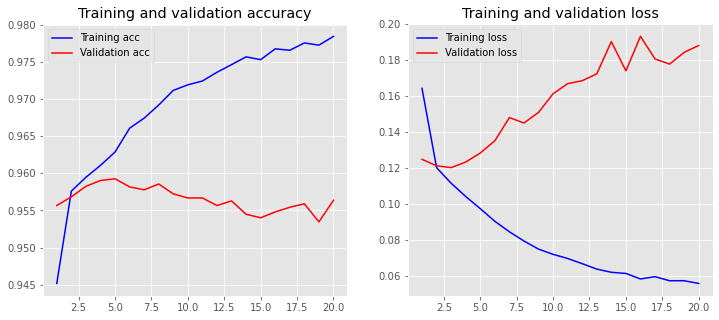

In [79]:
plot_history(history)

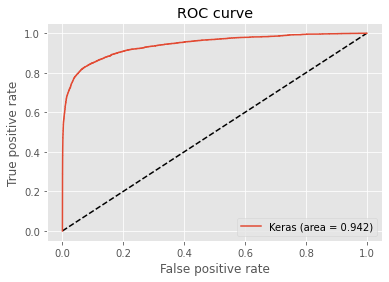

In [80]:
from sklearn.metrics import roc_curve
y_pred=model_lstm.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [81]:
model_stack_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 500),
                                 tf.keras.layers.LSTM(64,return_sequences = True),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_stack_lstm .summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 64)           192000    
_________________________________________________________________
lstm_14 (LSTM)               (None, 500, 64)           33024     
_________________________________________________________________
dropout_18 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 500, 64)           33024     
_________________________________________________________________
dropout_19 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
dense_9 (Dense)              (None, 500, 1)            65        
Total params: 258,113
Trainable params: 258,113
Non-trainable params: 0
_______________________________________________

In [82]:
model_stack_lstm.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [83]:
history = model_stack_lstm.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1
)

Epoch 1/20
1796/1796 [==============================] - 120s 63ms/step - loss: 0.3224 - accuracy: 0.9002 - val_loss: 0.3048 - val_accuracy: 0.9062
Epoch 2/20
1796/1796 [==============================] - 113s 63ms/step - loss: 0.3161 - accuracy: 0.9013 - val_loss: 0.3039 - val_accuracy: 0.9065
Epoch 3/20
1796/1796 [==============================] - 113s 63ms/step - loss: 0.3145 - accuracy: 0.9017 - val_loss: 0.3044 - val_accuracy: 0.9066
Epoch 4/20
1796/1796 [==============================] - 113s 63ms/step - loss: 0.3133 - accuracy: 0.9020 - val_loss: 0.3053 - val_accuracy: 0.9066
Epoch 5/20
1796/1796 [==============================] - 113s 63ms/step - loss: 0.3124 - accuracy: 0.9021 - val_loss: 0.3050 - val_accuracy: 0.9066
Epoch 6/20
1796/1796 [==============================] - 113s 63ms/step - loss: 0.3113 - accuracy: 0.9025 - val_loss: 0.3052 - val_accuracy: 0.9065
Epoch 7/20
1796/1796 [==============================] - 113s 63ms/step - loss: 0.3105 - accuracy: 0.9027 - val_loss: 0

In [87]:
from sklearn.metrics import roc_curve
y_pred=model_stack_lstm.predict(x_testing).ravel()
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [31915, 15957500]

In [85]:
y_testing=(model_stack_lstm.predict(x_testing)> 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words bbbb
report=classification_report(test_y,y_testing,digits=4)
print(report)

ValueError: Classification metrics can't handle a mix of binary and unknown targets

In [ ]:
model_cnn= tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 500),
                                 tf.keras.layers.Conv1D(64, 3, activation='relu'),
                                 tf.keras.layers.GlobalMaxPooling1D(),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_cnn.summary()

In [ ]:
model_cnn.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [ ]:
history = model_cnn.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1
)

In [ ]:
y_testing=(model_cnn.predict(x_testing)> 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,y_testing,digits=4)
print(report)

In [ ]:
from sklearn.metrics import roc_curve
y_pred=model_cnn.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [48]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
bi_model=Sequential()
bi_model.add(Embedding(max_feature,64,input_length = 500)
bi_model.add(Bidirectional(LSTM(128,return_sequences=True,dropout=0.3)))
bi_model.add(Dropout(0.3))
bi_model.add(Bidirectional(LSTM(128))) #lstm with 100 neurons
bi_model.add(Dropout(0.3))
bi_model.add(Dense(1,activation='sigmoid'))
bi_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(bi_model.summary())

SyntaxError: invalid syntax (<ipython-input-48-8ddf71d5d6b3>, line 7)